# CNN for Image Classification

## Importing the libraries

In [ ]:
import keras
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pylab as plt
from keras.preprocessing import image

In [ ]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
%config InlineBackend.figure_format = 'retina'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# 1. Data Preprocessing

## 1.1 Preprocessing the Training set

In [ ]:
BATCH_SIZE, IMG_SIZE = 16, (300, 300)
train = tf.keras.utils.image_dataset_from_directory('dataset/train',
                                                     shuffle=True,
                                                     batch_size=BATCH_SIZE,
                                                     image_size=IMG_SIZE)

Found 4609 files belonging to 2 classes.


## 1.2 Preprocessing the Test set

In [ ]:
test = tf.keras.utils.image_dataset_from_directory('dataset/test',
                                                    shuffle=True,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMG_SIZE)

Found 2303 files belonging to 2 classes.


## 1.3 Checking the class_name & previews

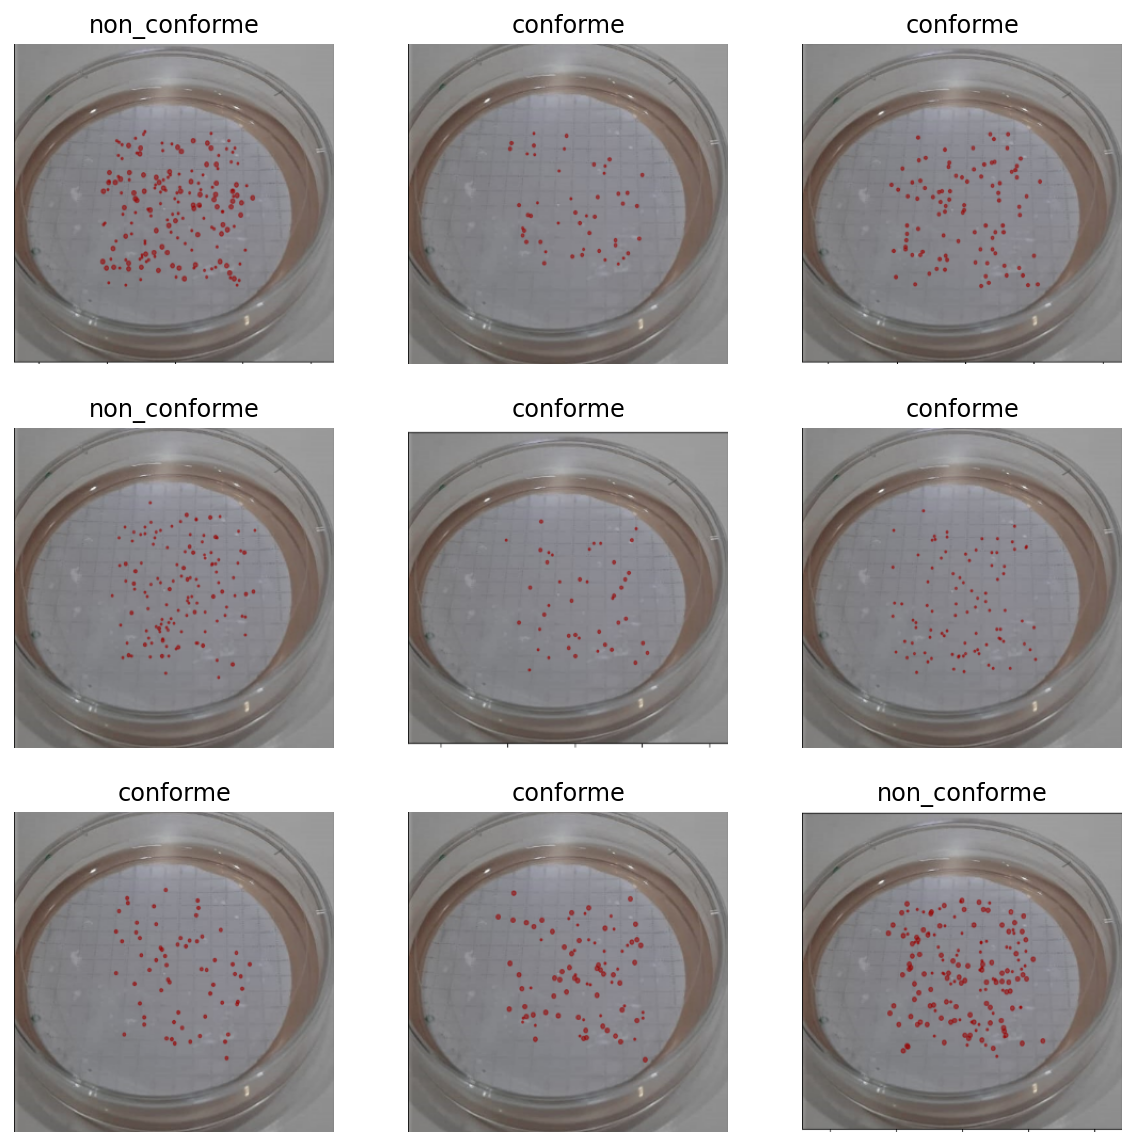

In [ ]:
class_names = train.class_names

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## 1.4 Configure the dataset for performance

In [ ]:
val_batches = tf.data.experimental.cardinality(test)
test_dataset = test.take(val_batches // 5)
validation_dataset = test.skip(val_batches // 5)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# 2. Building the CNN

### Initialising the CNN

In [ ]:
cnn_clf = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn_clf.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[300, 300, 3]))

### Step 2 - Pooling

In [ ]:
cnn_clf.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn_clf.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_clf.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn_clf.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn_clf.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn_clf.add(keras.layers.Dropout(0.2))

### Step 5 - Output Layer

In [ ]:
cnn_clf.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# 3. Training the CNN

### 3.1  Compiling the CNN

In [ ]:
cnn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 3.2 Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn_clf.fit(train_dataset, validation_data=validation_dataset, epochs=25)

Epoch 1/25
289/289 [==============================] - 23s 64ms/step - loss: 108.3888 - accuracy: 0.6407 - val_loss: 0.6471 - val_accuracy: 0.6528
Epoch 2/25
289/289 [==============================] - 17s 58ms/step - loss: 0.6455 - accuracy: 0.6546 - val_loss: 0.6456 - val_accuracy: 0.6534
Epoch 3/25
289/289 [==============================] - 16s 56ms/step - loss: 0.6444 - accuracy: 0.6546 - val_loss: 0.6451 - val_accuracy: 0.6539
Epoch 4/25
289/289 [==============================] - 18s 63ms/step - loss: 0.6447 - accuracy: 0.6546 - val_loss: 0.6451 - val_accuracy: 0.6539
Epoch 5/25
289/289 [==============================] - 16s 57ms/step - loss: 0.6450 - accuracy: 0.6544 - val_loss: 0.6434 - val_accuracy: 0.6571
Epoch 6/25
289/289 [==============================] - 17s 59ms/step - loss: 0.6440 - accuracy: 0.6546 - val_loss: 0.6425 - val_accuracy: 0.6582
Epoch 7/25
289/289 [==============================] - 16s 56ms/step - loss: 0.6386 - accuracy: 0.6539 - val_loss: 0.6450 - val_accurac

### 3.3 Model Summary

In [ ]:
cnn_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 149, 149, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 170528)            0         
                                                                 
 dense_2 (Dense)             (None, 256)              

## 4. Evaluating the model on test_data

In [ ]:
loss, accuracy = cnn_clf.evaluate(test_dataset)
print('Test accuracy :', accuracy)

28/28 [==============================] - 1s 28ms/step - loss: 0.6531 - accuracy: 0.6406
Test accuracy : 0.640625


## 5. Serialize model to HDF5

In [ ]:
cnn_clf.save_weights("cnn_model.h5")

## 6. Saving the model

In [ ]:
cnn_clf.save('cnn_model')

INFO:tensorflow:Assets written to: nouha_model\assets


INFO:tensorflow:Assets written to: nouha_model\assets


## 7. Loading the model back

In [ ]:
from tensorflow import keras
cnn_model = keras.models.load_model('cnn_model')